#Problem Statement 2

#**Logistic Regression, LDA and CART:**

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

**DATA DICTIONARY:**
-----------------------
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

**2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.**

In [ ]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import load_iris


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Checking Top few Records to get the feelings of the data
cps=pd.read_excel('Contraceptive_method_dataset.xlsx')

In [ ]:
cps.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [ ]:
cps.shape

(1473, 10)

In [ ]:
cps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [ ]:
# Descriptive statistics
cps.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check for null values
cps.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [ ]:
#Null value treatment using median
cols1=cps.isnull().sum()[cps.isnull().sum()>0].index
cols1

Index(['Wife_age', 'No_of_children_born'], dtype='object')

In [ ]:
objects1=cps[cols1].select_dtypes(include=['object','category']).columns
non_objects1=cps[cols1].select_dtypes(exclude=['object','category']).columns

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0) #nil, null, NaN
imputer= imputer.fit(cps[non_objects1])

In [ ]:
cps[non_objects1]=imputer.transform(cps[non_objects1])

In [ ]:
cps.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [ ]:
# Check for duplicates
dups = cps.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 85


In [ ]:
print('Before',cps.shape)
cps.drop_duplicates(inplace=True)
print('After',cps.shape)

Before (1473, 10)
After (1388, 10)


In [ ]:
dups = cps.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


<Axes: >

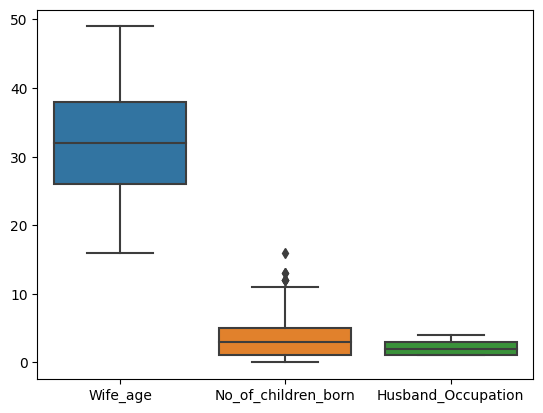

In [ ]:
# Check for outliers
sns.boxplot(data=cps, orient='v')

In [ ]:
# calculate upper and lower bound values for No_of_children_born
q1 = cps['No_of_children_born'].quantile(0.25)
q3 = cps['No_of_children_born'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

In [ ]:
# remove outliers for No_of_children_born using the above function
cps['No_of_children_born'] = np.where(cps['No_of_children_born'] > upper_bound, upper_bound, cps['No_of_children_born'])
cps['No_of_children_born'] = np.where(cps['No_of_children_born'] < lower_bound,lower_bound, cps['No_of_children_born'])


<Axes: >

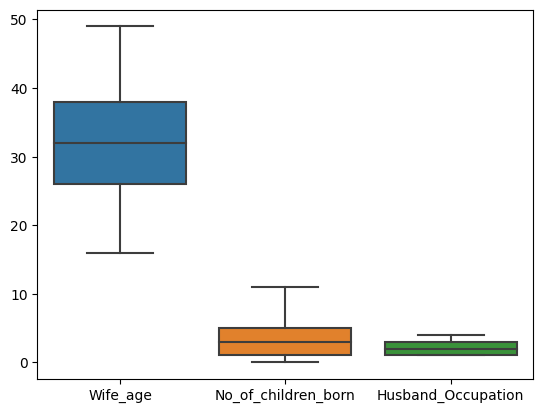

In [ ]:
# verify the outliers are removed using boxplot
sns.boxplot(data=cps, orient='v')

Univariat Analysis

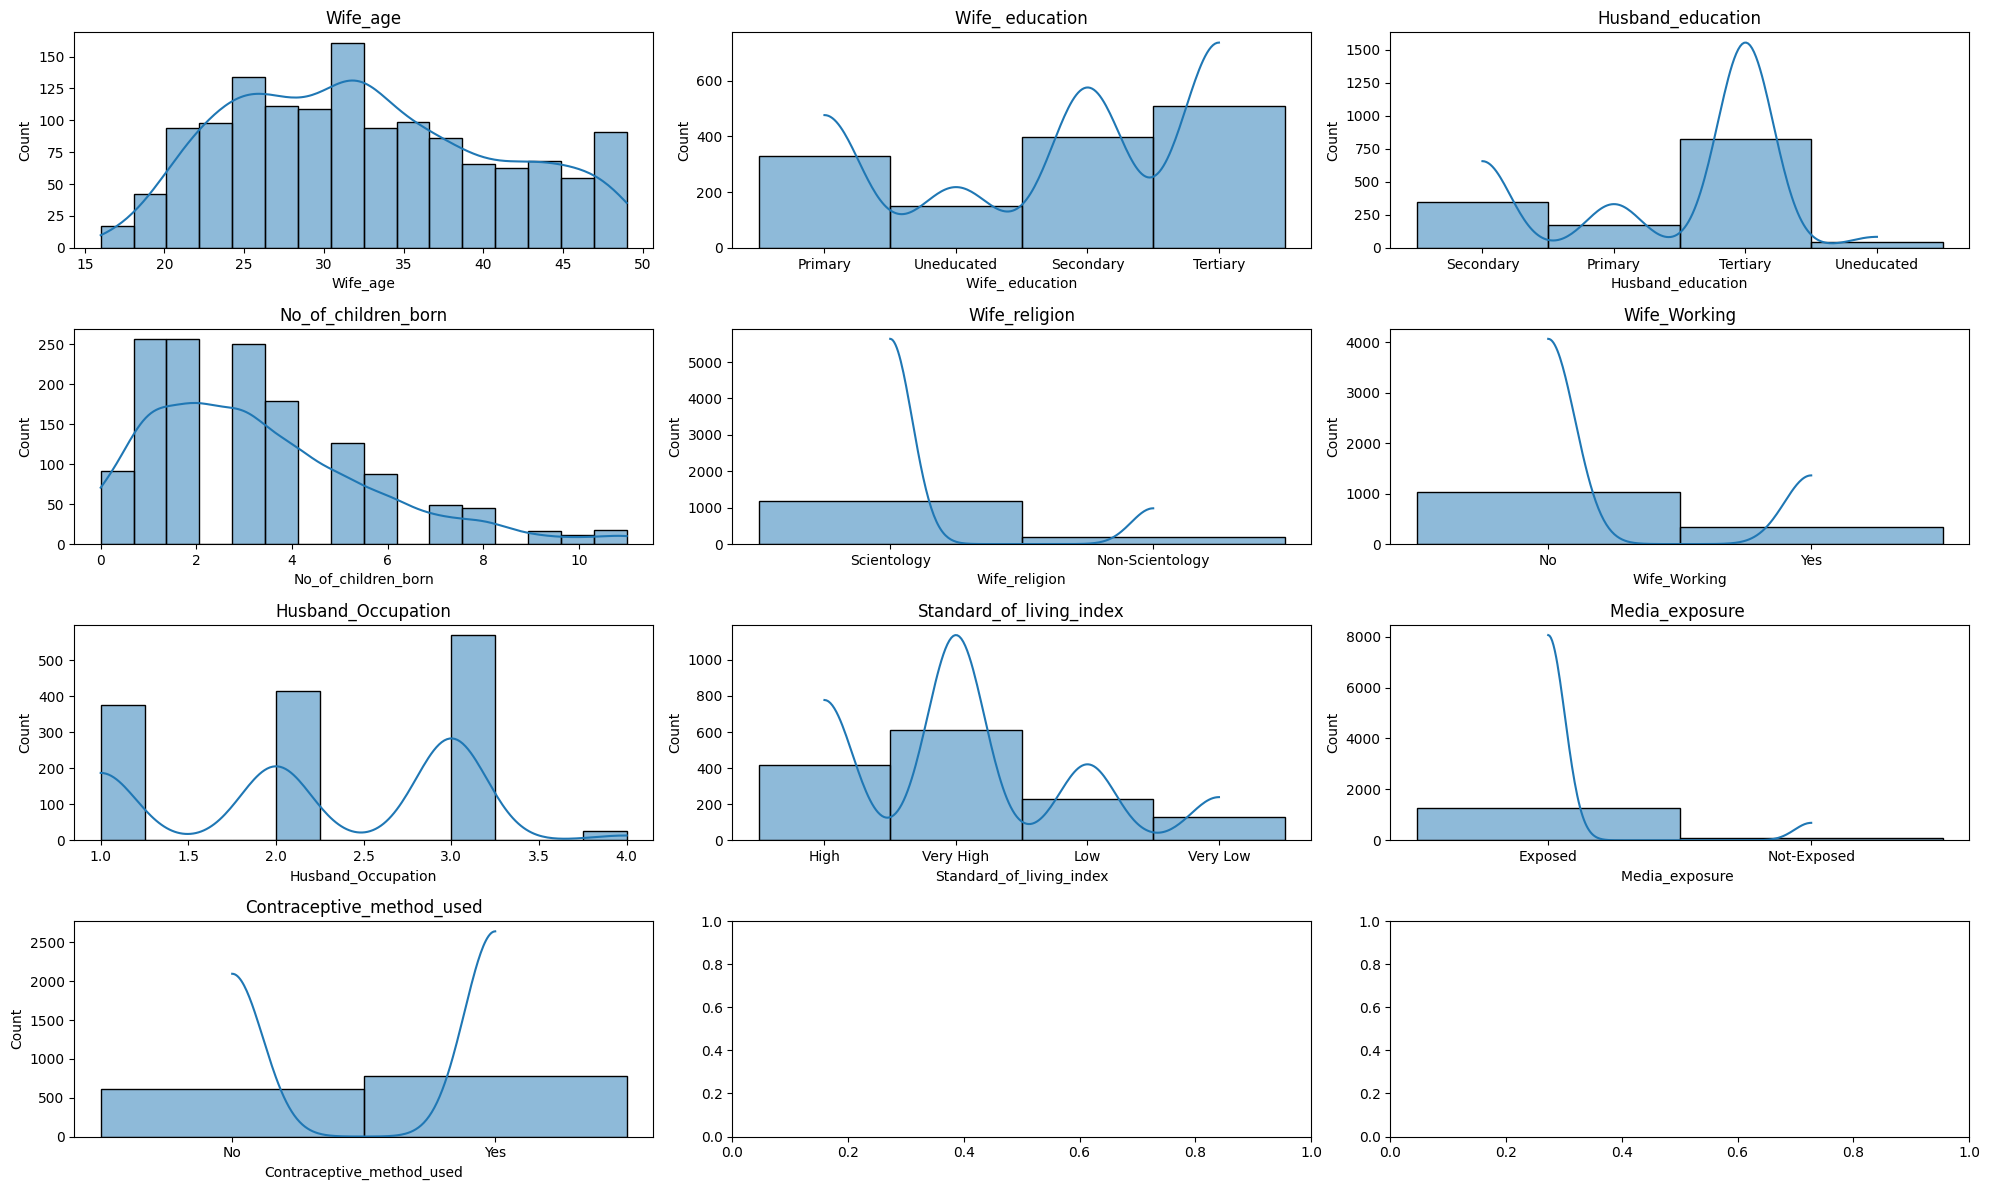

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))
axs = axs.flatten()

for i, col in enumerate(cps.columns):
    sns.histplot(cps[col], ax=axs[i],kde=True)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

Bivariate Analysis

<Figure size 1500x1000 with 0 Axes>

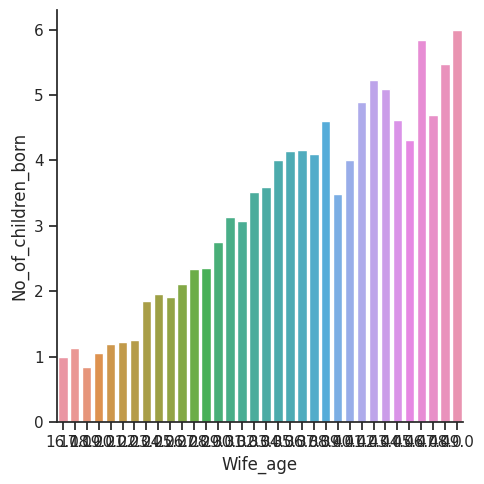

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="ticks", color_codes=True,)
sns.catplot(data=cps, x="Wife_age", y="No_of_children_born",  kind="bar", ci=None)

<Axes: xlabel='Wife_ education', ylabel='count'>

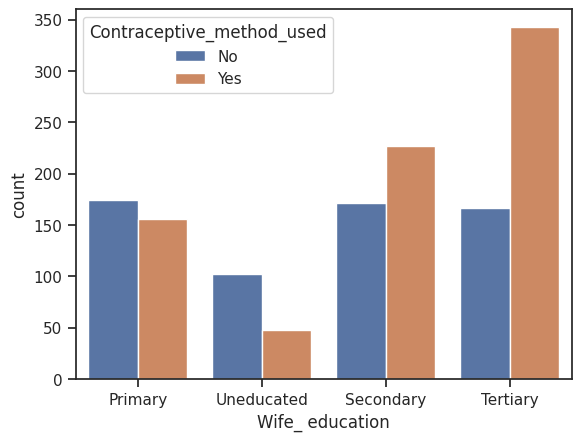

In [ ]:
sns.countplot(data=cps, x="Wife_ education", hue="Contraceptive_method_used")


<Axes: xlabel='Standard_of_living_index', ylabel='count'>

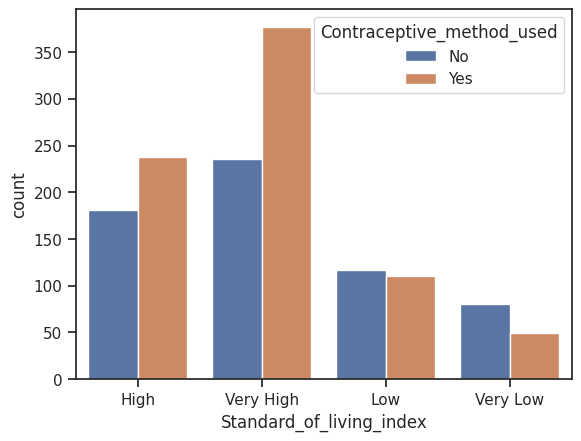

In [ ]:
sns.countplot(data=cps, x="Standard_of_living_index", hue="Contraceptive_method_used")


Multivariate Analysis

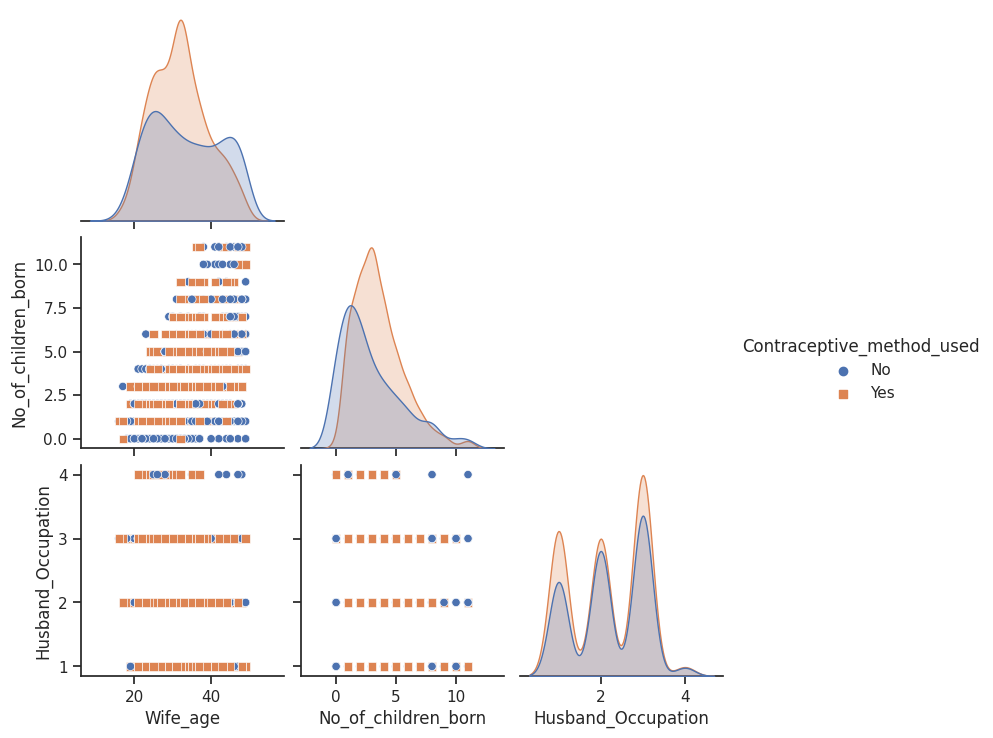

In [ ]:
sns.pairplot(cps, hue="Contraceptive_method_used",corner=True, markers=["o", "s", "D"])


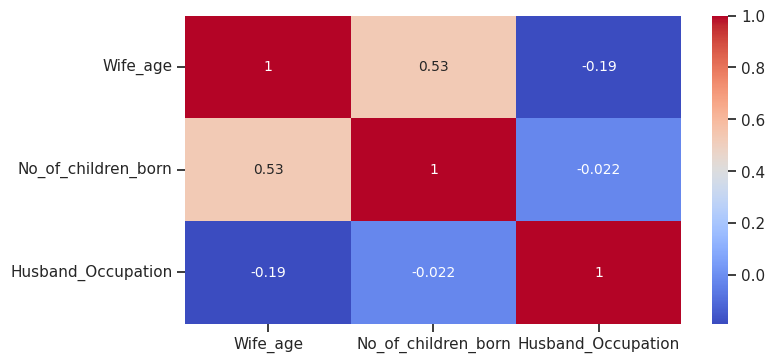

In [ ]:
fig = plt.figure(figsize=(8, 4))
%matplotlib inline
mask = np.triu(np.ones_like(cps.corr()))

corr_matrix = cps.corr()
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm", annot_kws={'size': 10})
plt.show()

**2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.**

In [ ]:
cps['Contraceptive_method_used'].value_counts()

Yes    774
No     614
Name: Contraceptive_method_used, dtype: int64

In [ ]:
cps["Contraceptive_method_used"]=cps["Contraceptive_method_used"].replace({'Yes':1, 'No':0})#Custom

In [ ]:
for feature in cps:
    if cps[feature].dtype == 'object':
        cps[feature] = pd.Categorical(cps[feature]).codes

        cps.Contraceptive_method_used=pd.Categorical(cps.Contraceptive_method_used).codes

In [ ]:
# Encode the categorical variables
cat_cols = ['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index','Media_exposure ']
df_encoded = pd.get_dummies(cps, columns=cat_cols, drop_first=True)


In [ ]:
df_encoded.head()

,Wife_age,No_of_children_born,Contraceptive_method_used,Wife_ education_1,Wife_ education_2,Wife_ education_3,Husband_education_1,Husband_education_2,Husband_education_3,Wife_religion_1,Wife_Working_1,Husband_Occupation_2,Husband_Occupation_3,Husband_Occupation_4,Standard_of_living_index_1,Standard_of_living_index_2,Standard_of_living_index_3,Media_exposure _1
0,24.0,3.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,45.0,10.0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,43.0,7.0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,42.0,9.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,36.0,8.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
X = df_encoded.drop('Contraceptive_method_used', axis=1)
Y = df_encoded.pop('Contraceptive_method_used')


In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [ ]:
dtc = DecisionTreeClassifier()
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))

print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.983522       0.597122
LDA                             0.684861       0.630695
Logistic Regression             0.682801       0.630695


Looks like Decision Tree Classifier, is under-fitting because train accuracy > test accuracy ., Let's Grid Search to get the best parameters  or prune the tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



In [ ]:
# Grid Search CV:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
    'criterion' :['gini', 'entropy']
}

dtr=tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 15}


In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=3, min_samples_split=30)
#Using best parameters in above
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))

print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.782698       0.649880
LDA                             0.684861       0.630695
Logistic Regression             0.682801       0.630695


Clearly now the underfitting of the model in Decison tree is reduced and Decison tree classifier results in the best accuracy score thus this model will be selected for classification

**2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.**

AUC: 0.870


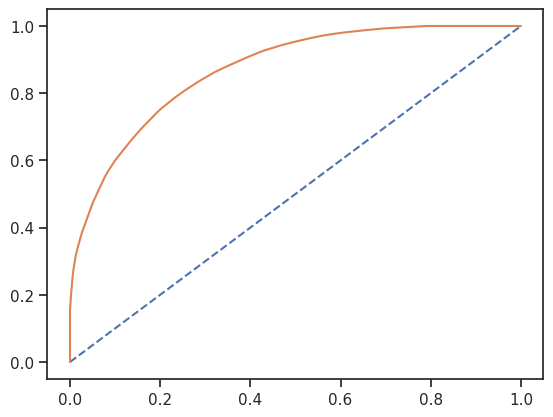

In [ ]:
# predict probabilities
probs = dtc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.870


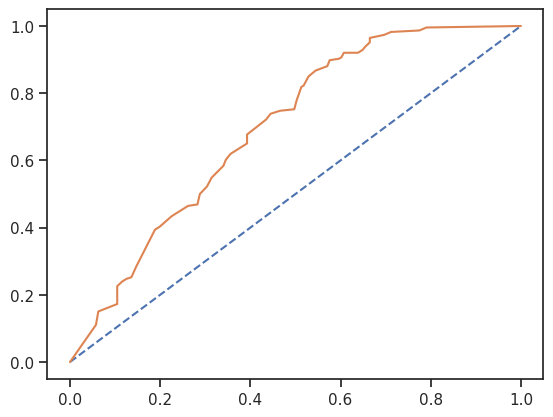

In [ ]:
# predict probabilities
probs = dtc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ImportError: ignored

Note: The aboev code showing error, however, We will need to re-run the next two codes, it will run with the required results

In [ ]:
print(classification_report(y_train, dtc.predict(X_train)))#Train Classification report

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       423
           1       0.79      0.84      0.81       548

    accuracy                           0.78       971
   macro avg       0.78      0.77      0.78       971
weighted avg       0.78      0.78      0.78       971



In [ ]:
print(classification_report(y_test, dtc.predict(X_test)))#Trainig Classification report

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       191
           1       0.65      0.78      0.71       226

    accuracy                           0.65       417
   macro avg       0.65      0.64      0.64       417
weighted avg       0.65      0.65      0.64       417



**2.4 Inference: Basis on these predictions, what are the insights and recommendations.**

**Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.**

Inferences:

* Wife's education and the number of children born significantly influence the use of contraceptive methods, as indicated by both the Logistic Regression and CART models.
-Husband's education also plays an important role in determining the use of contraceptives, as it influences the wife's decision-making process.


Recommendations:
* Focus on promoting contraceptive usage among women with a high and very high standard of living, as they are more likely to use them.
-Target women aged 25 to 35 with a good education level, as they are more likely to use contraceptives.
-Encourage husbands to be involved in family planning decisions, as their education level plays a significant role in the use of contraceptives.
-Investigate the reasons behind women with no children using contraceptives, as this could provide valuable insights.
-Leverage media exposure to promote contraceptive usage and awareness, as it plays a key role in shaping opinions.
-The Republic of Indonesia Ministry of Health should initiate outreach programs to educate women who do not use contraceptives about their benefits, usage, and potential side effects.
-Investigate why wives with 8, 10, 11, and 12 years of education are not using contraceptives, and address any barriers or misconceptions they may have.